In [ ]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_laplace
import matplotlib.pyplot as plt

# Load the microscope image
image = cv2.imread('Picture1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply LoG
log_image = gaussian_laplace(image, sigma=2)

# Normalize for display
log_image = (log_image - log_image.min()) / (log_image.max() - log_image.min())

# Display
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(log_image, cmap='gray'), plt.title('LoG Detection')
plt.show()


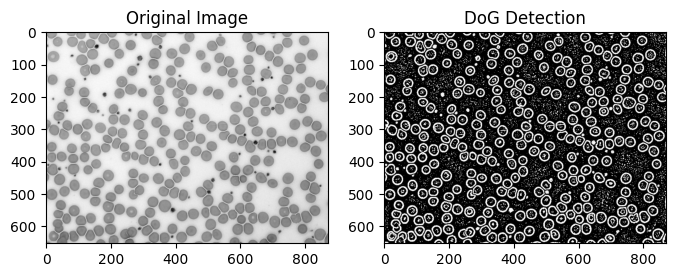

In [ ]:
def difference_of_gaussian(image, sigma1, sigma2):
    blur1 = cv2.GaussianBlur(image, (0, 0), sigma1)
    blur2 = cv2.GaussianBlur(image, (0, 0), sigma2)
    return blur1 - blur2

# Apply DoG
dog_image = difference_of_gaussian(image, sigma1=1, sigma2=2)

# Normalize for display
dog_image = (dog_image - dog_image.min()) / (dog_image.max() - dog_image.min())

# Display
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(dog_image, cmap='gray'), plt.title('DoG Detection')
plt.show()


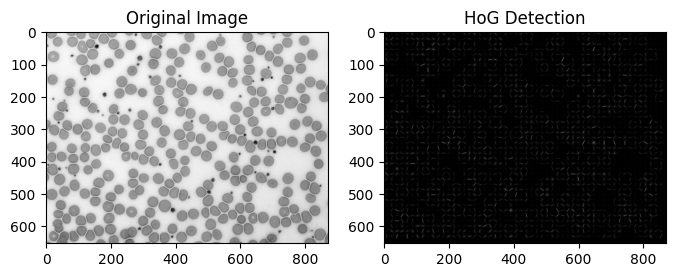

In [ ]:
from skimage.feature import hog
from skimage import color

# Compute HoG features
hog_features, hog_image = hog(image, visualize=True, pixels_per_cell=(16, 16), cells_per_block=(1, 1))

# Display
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(hog_image, cmap='gray'), plt.title('HoG Detection')
plt.show()


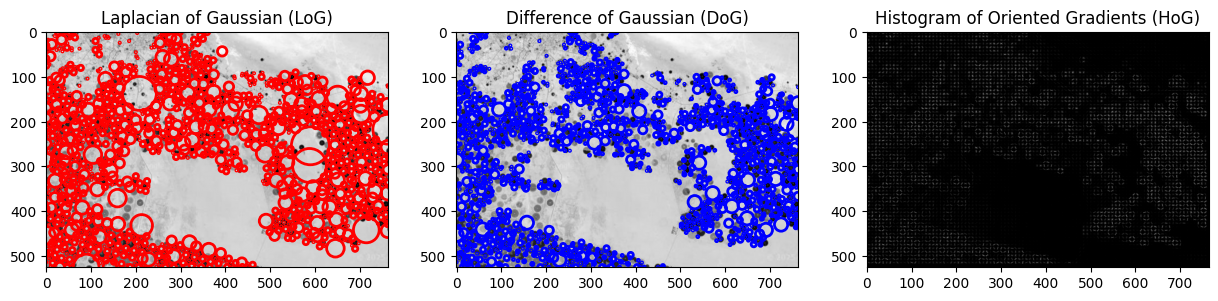

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_dog, hog
from skimage import color
from skimage.io import imread

# Load the image in grayscale
image_path = "test1.png"  # Replace with your image path
image = imread(image_path, as_gray=True)

# 1. Laplacian of Gaussian (LoG) Blob Detection
log_blobs = blob_log(image, max_sigma=30, num_sigma=10, threshold=0.1)

# 2. Difference of Gaussian (DoG) Blob Detection
dog_blobs = blob_dog(image, max_sigma=30, threshold=0.1)

# 3. Histogram of Oriented Gradients (HoG)
hog_features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Convert blobs into coordinates
log_blobs[:, 2] = log_blobs[:, 2] * np.sqrt(2)
dog_blobs[:, 2] = dog_blobs[:, 2] * np.sqrt(2)

# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Display LoG results
ax[0].imshow(image, cmap='gray')
for blob in log_blobs:
    y, x, r = blob
    circle = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax[0].add_patch(circle)
ax[0].set_title("Laplacian of Gaussian (LoG)")

# Display DoG results
ax[1].imshow(image, cmap='gray')
for blob in dog_blobs:
    y, x, r = blob
    circle = plt.Circle((x, y), r, color='blue', linewidth=2, fill=False)
    ax[1].add_patch(circle)
ax[1].set_title("Difference of Gaussian (DoG)")

# Display HoG results
ax[2].imshow(hog_image, cmap='gray')
ax[2].set_title("Histogram of Oriented Gradients (HoG)")

plt.show()


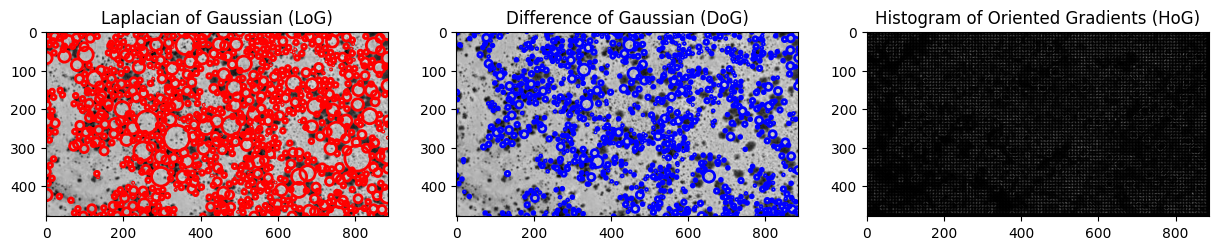

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_dog, hog
from skimage import color
from skimage.io import imread

# Load the image in grayscale
image_path = "test2.png"  # Replace with your image path
image = imread(image_path, as_gray=True)

# 1. Laplacian of Gaussian (LoG) Blob Detection
log_blobs = blob_log(image, max_sigma=30, num_sigma=10, threshold=0.1)

# 2. Difference of Gaussian (DoG) Blob Detection
dog_blobs = blob_dog(image, max_sigma=30, threshold=0.1)

# 3. Histogram of Oriented Gradients (HoG)
hog_features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Convert blobs into coordinates
log_blobs[:, 2] = log_blobs[:, 2] * np.sqrt(2)
dog_blobs[:, 2] = dog_blobs[:, 2] * np.sqrt(2)

# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Display LoG results
ax[0].imshow(image, cmap='gray')
for blob in log_blobs:
    y, x, r = blob
    circle = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax[0].add_patch(circle)
ax[0].set_title("Laplacian of Gaussian (LoG)")

# Display DoG results
ax[1].imshow(image, cmap='gray')
for blob in dog_blobs:
    y, x, r = blob
    circle = plt.Circle((x, y), r, color='blue', linewidth=2, fill=False)
    ax[1].add_patch(circle)
ax[1].set_title("Difference of Gaussian (DoG)")

# Display HoG results
ax[2].imshow(hog_image, cmap='gray')
ax[2].set_title("Histogram of Oriented Gradients (HoG)")

plt.show()


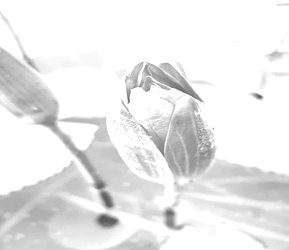

In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread('Picture2.jpg', cv2.IMREAD_GRAYSCALE)
def adjust_brightness_contrast(image, alpha=1.5, beta=30):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

enhanced_image = adjust_brightness_contrast(image)



cv2_imshow(enhanced_image)  # Display image

#cv2.imshow("Brightness & Contrast", enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


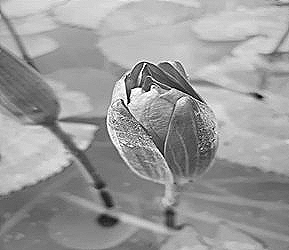

In [ ]:
# Sharpening kernel
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)


cv2_imshow(sharpened_image)
#cv2.imshow("Sharpened Image", sharpened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


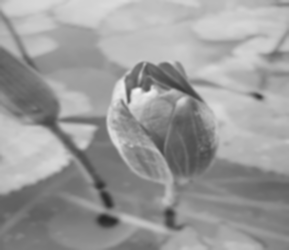

In [ ]:
denoised_image = cv2.GaussianBlur(image, (5, 5), 0)

cv2_imshow( denoised_image)
#cv2.imshow("Denoised Image", denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


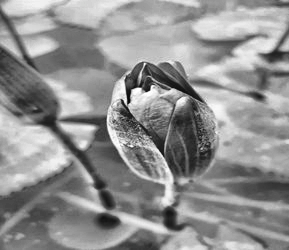

In [ ]:

if len(image.shape) == 2 or image.shape[-1] == 1:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Convert to LAB color space
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l = clahe.apply(l)
enhanced_lab = cv2.merge([l, a, b])


enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)

# Display result
cv2_imshow(enhanced_image)


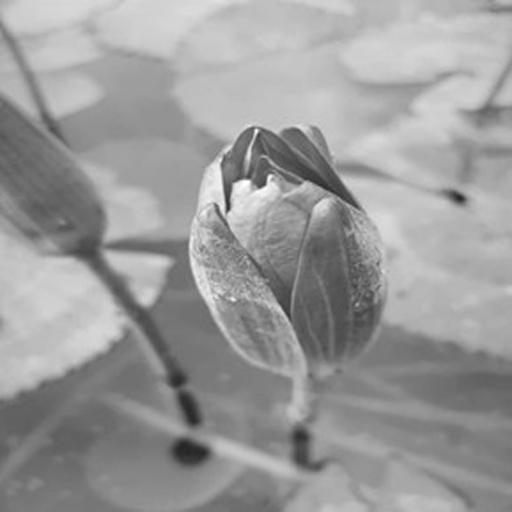

In [ ]:
#resizing
resized_image = cv2.resize(image, (512, 512), interpolation=cv2.INTER_CUBIC)
cv2_imshow(resized_image)
#cv2.imshow("Resized Image", resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode
#image = cv2.imread('microscope_image.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    raise ValueError("Error: Image not loaded. Check file path!")

# Convert image to float32 and normalize it
image_float32 = np.float32(image) / 255.0  # Normalize values between 0 and 1

# Compute the Discrete Fourier Transform (DFT)
dft = cv2.dft(image_float32, flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero frequency component to the center
dft_shift = np.fft.fftshift(dft)

# Compute the magnitude spectrum (Avoid log(0) by adding a small constant)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1e-5)

# Display the result using Matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform')
plt.axis('off')
plt.show()


error: OpenCV(4.11.0) /io/opencv/modules/core/src/dxt.cpp:3506: error: (-215:Assertion failed) type == CV_32FC1 || type == CV_32FC2 || type == CV_64FC1 || type == CV_64FC2 in function 'dft'


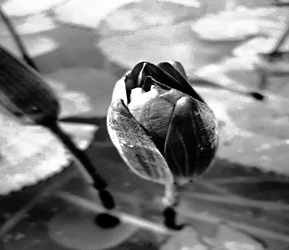

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use this for displaying images in Colab

# Load the image in grayscale mode
image = cv2.imread('Picture2.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    raise ValueError("Error: Image not loaded. Check file path!")

# Convert to 8-bit if needed
if image.dtype != np.uint8:
    image = cv2.convertScaleAbs(image)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the result
cv2_imshow(equalized_image)  # Use this in Google Colab
# If running locally, use: cv2.imshow("Equalized Image", equalized_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


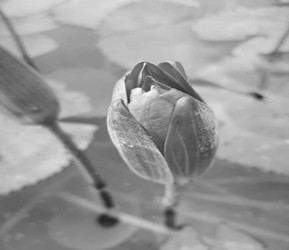

In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread('Picture2.jpg', cv2.IMREAD_GRAYSCALE)

def inverse_transform(image):
    return cv2.bitwise_not(image)

cv2_imshow(image)

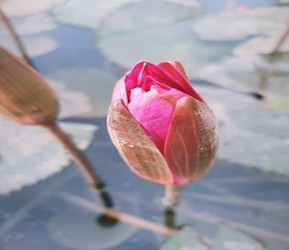

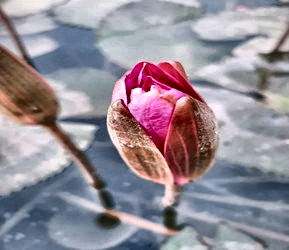

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the image
image = cv2.imread('Picture2.jpg')

# Check if image is loaded
if image is None:
    raise ValueError("Error: Image not loaded. Check file path!")

# Convert to LAB color space
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split LAB channels
l, a, b = cv2.split(lab)

# Apply CLAHE to the L channel (for better brightness/contrast)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
l = clahe.apply(l)

# Merge channels back
corrected_lab = cv2.merge([l, a, b])

# Convert back to BGR color space
corrected_image = cv2.cvtColor(corrected_lab, cv2.COLOR_LAB2BGR)

# Show the original and corrected images
cv2_imshow(image)  # Original Image
cv2_imshow(corrected_image)  # Color Corrected Image


In [ ]:
# Install required libraries
!pip install torch torchvision

# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import time

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Step 1: Load CIFAR-100 Dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing for pretrained models
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Load Pretrained Models (AlexNet & VGG16)
alexnet = models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(4096, 100)  # Modify output layer
alexnet.to(device)

vgg16 = models.vgg16(pretrained=True)
vgg16.classifier[6] = nn.Linear(4096, 100)  # Modify output layer
vgg16.to(device)

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer_alex = optim.Adam(alexnet.parameters(), lr=0.001)
optimizer_vgg = optim.Adam(vgg16.parameters(), lr=0.001)

# Training Function
def train_model(model, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

# Train AlexNet
print("\nTraining AlexNet...")
train_model(alexnet, optimizer_alex)

# Train VGG16
print("\nTraining VGG16...")
train_model(vgg16, optimizer_vgg)

# Evaluation Function
def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    start_time = time.time()

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    inference_time = time.time() - start_time
    return accuracy, inference_time

# Evaluate and Compare
alexnet_acc, alexnet_time = evaluate_model(alexnet)
vgg16_acc, vgg16_time = evaluate_model(vgg16)

print("\nModel Performance Comparison:")
print(f"AlexNet  - Accuracy: {alexnet_acc:.2f}%, Inference Time: {alexnet_time:.2f}s")
print(f"VGG16    - Accuracy: {vgg16_acc:.2f}%, Inference Time: {vgg16_time:.2f}s")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 835.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

100%|██████████| 169M/169M [00:02<00:00, 77.8MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 132MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'we


Training AlexNet...


KeyboardInterrupt: 

In [ ]:
# Install required libraries
!pip install torch torchvision

# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import time
import random

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Step 1: Load a Subset of CIFAR-100 for Faster Training
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Smaller image size for faster training
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load full CIFAR-100 dataset
full_trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
full_testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Select only 20 random classes
selected_classes = random.sample(range(100), 20)
class_mapping = {orig_label: new_label for new_label, orig_label in enumerate(selected_classes)}

# Filter dataset to only include selected classes and remap labels
train_indices = [i for i in range(len(full_trainset)) if full_trainset.targets[i] in selected_classes]
test_indices = [i for i in range(len(full_testset)) if full_testset.targets[i] in selected_classes]

# Create dataset subsets with remapped labels
class RemappedDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, indices):
        self.dataset = dataset
        self.indices = indices

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        img, label = self.dataset[self.indices[idx]]
        return img, class_mapping[label]  # Remap label

trainset = RemappedDataset(full_trainset, train_indices[:10000])  # Use 10,000 samples
testset = RemappedDataset(full_testset, test_indices[:2000])  # Use 2,000 test samples

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Step 2: Load Pretrained Models (AlexNet & VGG16)
alexnet = models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(4096, 20)  # Modify output layer to 20 classes
alexnet.to(device)

vgg16 = models.vgg16(pretrained=True)
vgg16.classifier[6] = nn.Linear(4096, 20)  # Modify output layer to 20 classes
vgg16.to(device)

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer_alex = optim.Adam(alexnet.parameters(), lr=0.001)
optimizer_vgg = optim.Adam(vgg16.parameters(), lr=0.001)

# Training Function
def train_model(model, optimizer, epochs=3):  # Reduce epochs to 3
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

# Train AlexNet
print("\nTraining AlexNet (Reduced Data)...")
train_model(alexnet, optimizer_alex)

# Train VGG16
print("\nTraining VGG16 (Reduced Data)...")
train_model(vgg16, optimizer_vgg)

# Evaluation Function
def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    start_time = time.time()

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    inference_time = time.time() - start_time
    return accuracy, inference_time

# Evaluate and Compare
alexnet_acc, alexnet_time = evaluate_model(alexnet)
vgg16_acc, vgg16_time = evaluate_model(vgg16)

print("\nModel Performance Comparison:")
print(f"AlexNet  - Accuracy: {alexnet_acc:.2f}%, Inference Time: {alexnet_time:.2f}s")
print(f"VGG16    - Accuracy: {vgg16_acc:.2f}%, Inference Time: {vgg16_time:.2f}s")


Using device: cpu

Training AlexNet (Reduced Data)...
Epoch 1, Loss: 3.0053
Epoch 2, Loss: 2.9967
Epoch 3, Loss: 2.9977

Training VGG16 (Reduced Data)...
